In [1]:
import numpy as np
# Maturities in years
maturities = np.array([0.5, 1, 2, 3, 5, 10, 15, 20,])

# Yields corresponding to those maturities (in %)
yields = np.array([13.5, 14.9, 15.5, 16.0, 16.1, 16.2, 16.9, 17.1])


In [2]:
def nelson_siegel(tau, beta0, beta1, beta2, lambd):
    """Nelson-Siegel yield curve function"""
    term1 = (1 - np.exp(-lambd * tau)) / (lambd * tau)
    term2 = term1 - np.exp(-lambd * tau)
    return beta0 + beta1 * term1 + beta2 * term2


In [3]:
from scipy.optimize import curve_fit

# Initial guess for parameters: [beta0, beta1, beta2, lambda]
initial_guess = [17.1, -2.8, -1.0, 0.5]

# Fit the curve
params, covariance = curve_fit(nelson_siegel, maturities, yields, p0=initial_guess)

# Extract fitted parameters
beta0, beta1, beta2, lambd = params
print(f"Fitted parameters:\n beta0={beta0:.4f}, beta1={beta1:.4f}, beta2={beta2:.4f}, lambda={lambd:.4f}")


Fitted parameters:
 beta0=16.8490, beta1=-5.2650, beta2=-0.0007, lambda=2.0938


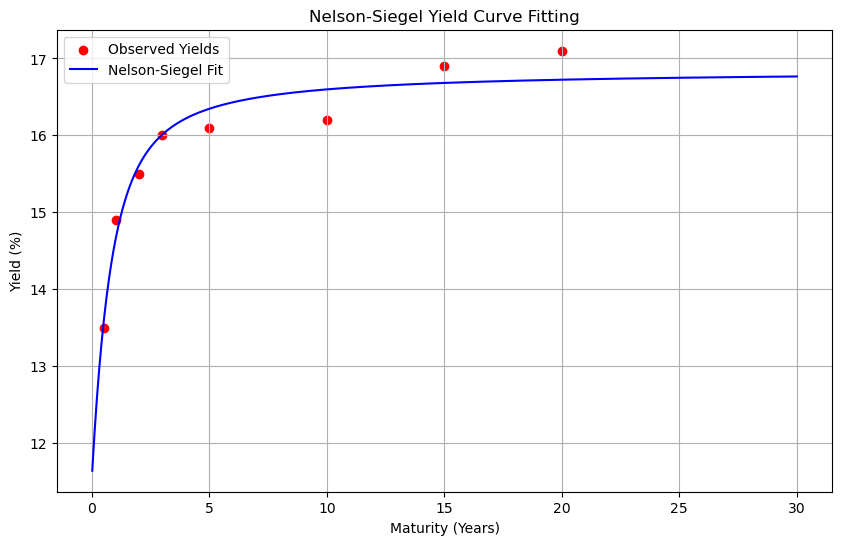

In [4]:
import matplotlib.pyplot as plt

# Generate smooth curve for plotting
tau_fine = np.linspace(0.01, 30, 300)
fitted_yields = nelson_siegel(tau_fine, beta0, beta1, beta2, lambd)

plt.figure(figsize=(10,6))
plt.scatter(maturities, yields, color='red', label='Observed Yields')
plt.plot(tau_fine, fitted_yields, label='Nelson-Siegel Fit', color='blue')
plt.title('Nelson-Siegel Yield Curve Fitting')
plt.xlabel('Maturity (Years)')
plt.ylabel('Yield (%)')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline


In [6]:
cs = CubicSpline(maturities, yields)


In [7]:
maturities_fine = np.linspace(0.5, 20, 100)  # create smooth points
yields_fitted = cs(maturities_fine)


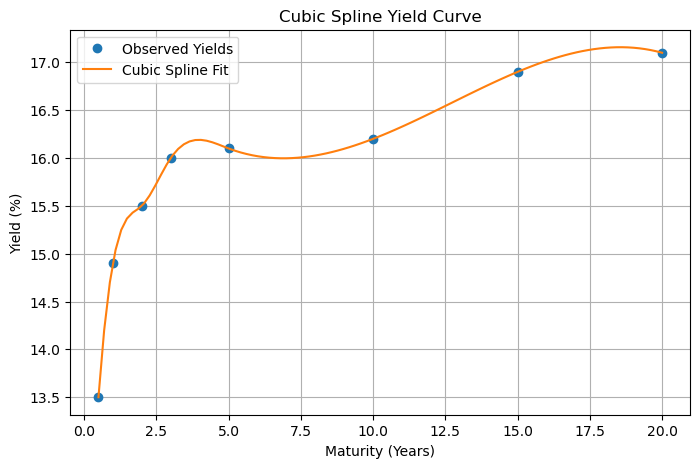

In [8]:
plt.figure(figsize=(8,5))
plt.plot(maturities, yields, 'o', label='Observed Yields') # observed points
plt.plot(maturities_fine, yields_fitted, label='Cubic Spline Fit') # smooth curve
plt.xlabel('Maturity (Years)')
plt.ylabel('Yield (%)')
plt.title('Cubic Spline Yield Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
(e)
Comparison of the two curves in terms of ;
1) Fit
Nelson-Siegel:
Fitted parameters:
β₀ ≈ 16.85
β₁ ≈ -5.27
β₂ ≈ 0.00007
τ ≈ 0.48
Mean Squared Error (MSE): ≈ 0.062

Cubic Spline:
Visually, it passes exactly through all observed data points (interpolates perfectly).
It is not designed to extrapolate or generalize; it strictly fits the data points.


2) Interpretation
Nelson-Siegel:
Offers economic interpretability:
β₀: Long-term level of interest rates
β₁: Short-term component (slope)
β₂: Medium-term hump (curvature)
Smooth and flexible, useful for modeling term structures in finance.
Can extrapolate beyond the data range.

Cubic Spline:
Purely mathematical: No economic interpretation of coefficients.
Excellent fit within observed range but may behave erratically outside it.
Good for visualizing data and interpolation, less ideal for forecasting or macroeconomic modeling.

In [ ]:
(g)
NO, it is not considered unethical because of some of the following reasons:

1) The Nelson-Siegel model is used to summarize and interpret interest rate data in a consistent, manageable way. 
It helps policymakers, investors, and analysts understand the term structure of interest rates, especially when there is noise in market data.
Its purpose is therefore transparency, not deception.

2) It is a well-established, economically interpretable model used by central banks, financial institutions, and academics. 
Its use is documented, reproducible, and based on sound financial theory—not hidden manipulation, thereby widely accepted standard.

3) The concept of smoothing in this context is about filtering out short-term noise, not hiding information. 
The raw yields are still available, and the model just provides a structured view of the underlying trends.
It therefore doesn’t distort, it simplifies.